In [ ]:
import pandas as pd

file_path = 'dataset/training.1600000.processed.noemoticon.csv'

try:
    df = pd.read_csv(file_path, header=None, encoding='latin1')
    df.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']
    print(df.head())
    print(df.info())
except FileNotFoundError:
    print("this file path is not exists")
except Exception as e:
    print("unexpected Error")

In [ ]:
import pandas as pd

file_path = 'dataset/training.1600000.processed.noemoticon.csv'

try:
    df = pd.read_csv(file_path, header=None, encoding='latin1', skiprows=[0]) 
    df.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']
    print(df.head())
    print(df.info())
    print("\n--------------------\n")
    print(df['sentiment'].value_counts())
    print("\n--------------------\n")
    print(df.dtypes)
except FileNotFoundError:
    print("not found")
except Exception as e:
    print("unexpected Error")

   sentiment          id                          date     query  \
0          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
1          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
2          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
3          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4          0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   

            user                                               text  
0  scotthamilton  is upset that he can't update his Facebook by ...  
1       mattycus  @Kenichan I dived many times for the ball. Man...  
2        ElleCTF    my whole body feels itchy and like its on fire   
3         Karoli  @nationwideclass no, it's not behaving at all....  
4       joy_wolf                      @Kwesidei not the whole crew   
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048572 entries, 0 to 1048571
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --

In [13]:
df['text_lower'] = df['text'].str.lower()
print(df[['text', 'text_lower']].head())

                                                text  \
0  is upset that he can't update his Facebook by ...   
1  @Kenichan I dived many times for the ball. Man...   
2    my whole body feels itchy and like its on fire    
3  @nationwideclass no, it's not behaving at all....   
4                      @Kwesidei not the whole crew    

                                          text_lower  
0  is upset that he can't update his facebook by ...  
1  @kenichan i dived many times for the ball. man...  
2    my whole body feels itchy and like its on fire   
3  @nationwideclass no, it's not behaving at all....  
4                      @kwesidei not the whole crew   


In [4]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [17]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [18]:
df['text_no_punct'] = df['text_lower'].apply(remove_punctuation)
print(df[['text_lower', 'text_no_punct']].head())

                                          text_lower  \
0  is upset that he can't update his facebook by ...   
1  @kenichan i dived many times for the ball. man...   
2    my whole body feels itchy and like its on fire    
3  @nationwideclass no, it's not behaving at all....   
4                      @kwesidei not the whole crew    

                                       text_no_punct  
0  is upset that he cant update his facebook by t...  
1  kenichan i dived many times for the ball manag...  
2    my whole body feels itchy and like its on fire   
3  nationwideclass no its not behaving at all im ...  
4                       kwesidei not the whole crew   


In [19]:
import re
def remove_punctuation_regex(text):
    return re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~؟،.]', '', text)


In [23]:
sentiment_dict = {
    'happy': 1,
    'good': 1,
    'great': 1,
    'love': 1,
    'like': 1,
    'best': 1,
    'amazing': 1,
    'wonderful': 1,
    'excellent': 1,
    'enjoy': 1,
    'fun': 1,
    'bad': -1,
    'terrible': -1,
    'awful': -1,
    'hate': -1,
    'dislike': -1,
    'worst': -1,
    'horrible': -1,
    'sad': -1,
    'angry': -1,
    'upset': -1
    # می‌توانید کلمات بیشتری اضافه کنید
}

print(sentiment_dict)
print(f"امتیاز کلمه 'happy': {sentiment_dict.get('happy')}")
print(f"امتیاز کلمه 'bad': {sentiment_dict.get('bad')}")
print(f"امتیاز کلمه 'neutral': {sentiment_dict.get('neutral', 0)}") # اگر کلمه نباشد 0 برمی‌گرداند

{'happy': 1, 'good': 1, 'great': 1, 'love': 1, 'like': 1, 'best': 1, 'amazing': 1, 'wonderful': 1, 'excellent': 1, 'enjoy': 1, 'fun': 1, 'bad': -1, 'terrible': -1, 'awful': -1, 'hate': -1, 'dislike': -1, 'worst': -1, 'horrible': -1, 'sad': -1, 'angry': -1, 'upset': -1}
امتیاز کلمه 'happy': 1
امتیاز کلمه 'bad': -1
امتیاز کلمه 'neutral': 0


In [24]:
def calculate_sentiment_score(text):
    words = text.split()
    score = 0
    for word in words:
        if word in sentiment_dict:
            score += sentiment_dict[word]
    return score

df['sentiment_score'] = df['text_no_punct'].apply(calculate_sentiment_score)

print(df[['text', 'text_no_punct', 'sentiment_score']].head())

                                                text  \
0  is upset that he can't update his Facebook by ...   
1  @Kenichan I dived many times for the ball. Man...   
2    my whole body feels itchy and like its on fire    
3  @nationwideclass no, it's not behaving at all....   
4                      @Kwesidei not the whole crew    

                                       text_no_punct  sentiment_score  
0  is upset that he cant update his facebook by t...               -1  
1  kenichan i dived many times for the ball manag...                0  
2    my whole body feels itchy and like its on fire                 1  
3  nationwideclass no its not behaving at all im ...                0  
4                       kwesidei not the whole crew                 0  


In [ ]:
def categorize_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

df['predicted_sentiment'] = df['sentiment_score'].apply(categorize_sentiment)

print(df[['text', 'sentiment_score', 'predicted_sentiment']].head())

print("\n number of comment in classes")
print(df['predicted_sentiment'].value_counts())

In [37]:
print("column s name")
print(df.columns)

print("\n unique in 'sentiment':")
print(df['sentiment'].unique())

print("\n number of Colum in 'sentiment':")
print(df['sentiment'].value_counts())

column s name
Index(['sentiment', 'id', 'date', 'query', 'user', 'text', 'text_lower',
       'text_no_punct', 'sentiment_score', 'predicted_sentiment'],
      dtype='object')

 unique in 'sentiment':
[0 4]

 number of Colum in 'sentiment':
sentiment
0    799996
4    248576
Name: count, dtype: int64


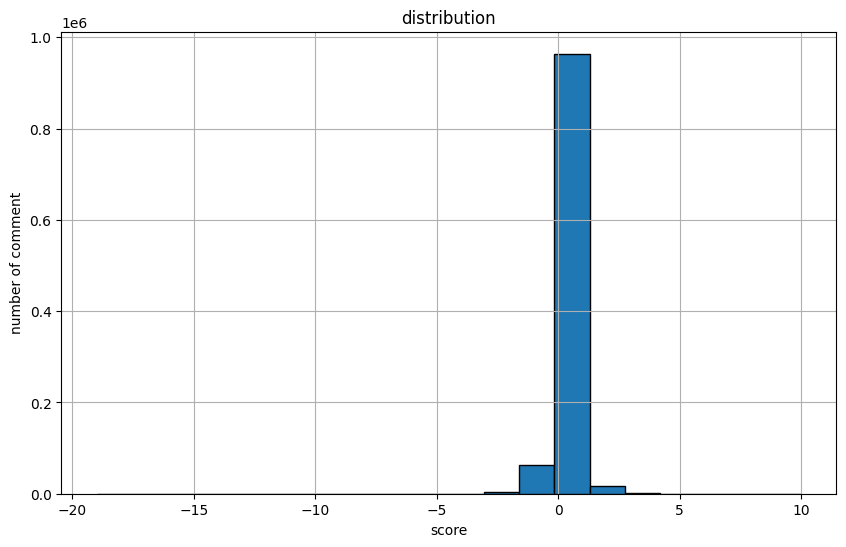

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.hist(df['sentiment_score'], bins=20, edgecolor='black')

plt.title('distribution')
plt.xlabel('score')
plt.ylabel('number of comment')

plt.grid(True)
plt.show()

In [ ]:
sentiment_mapping = {0: 'negative', 4: 'positive'}

df['actual_sentiment'] = df['sentiment'].map(sentiment_mapping)

print("\n show rows'actual_sentiment':")
print(df[['sentiment', 'actual_sentiment', 'predicted_sentiment']].head())

print("\n number of classes")
print(df['actual_sentiment'].value_counts())


نمایش چند سطر اول دیتافریم با ستون 'actual_sentiment':
   sentiment actual_sentiment predicted_sentiment
0          0         negative            negative
1          0         negative             neutral
2          0         negative            positive
3          0         negative             neutral
4          0         negative             neutral

تعداد هر یک از برچسب‌های واقعی متنی:
actual_sentiment
negative    799996
positive    248576
Name: count, dtype: int64


<Axes: xlabel='c', ylabel='n of NaN'>

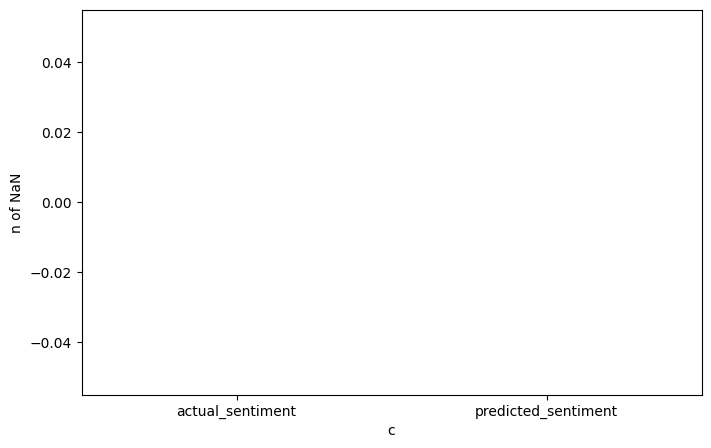

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

nan_counts = pd.DataFrame({
    'c': ['actual_sentiment', 'predicted_sentiment'],
    'n of NaN': [df['actual_sentiment'].isnull().sum(), df['predicted_sentiment'].isnull().sum()]
})

plt.figure(figsize=(8, 5))

sns.barplot(x='c', y='n of NaN', data=nan_counts, hue='c', palette='viridis', legend=False)


In [56]:
print(df['actual_sentiment'].isnull().sum())

df_evaluated = df.dropna(subset=['actual_sentiment', 'predicted_sentiment'])

print(df_evaluated['actual_sentiment'].isnull().sum())

print(len(df_evaluated))

0
0
1048572


In [60]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(df_evaluated['actual_sentiment'], df_evaluated['predicted_sentiment'])

print(f"accuracy : {accuracy:.2f}")

accuracy : 0.12


<BarContainer object of 1 artists>

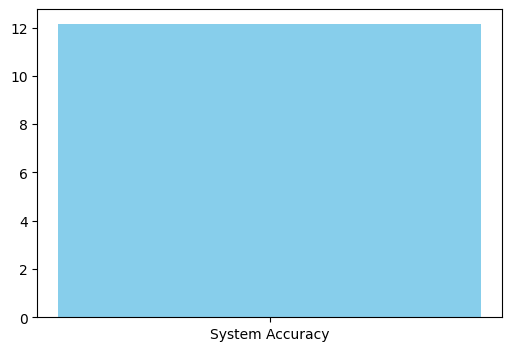

In [62]:
import matplotlib.pyplot as plt

accuracy_value = accuracy * 100  
labels = ['System Accuracy']
values = [accuracy_value]

plt.figure(figsize=(6, 4))

plt.bar(labels, values, color='skyblue')